In [1]:
# | default_exp diff_scratch

%load_ext autoreload
%autoreload 2

%env PYDEVD_DISABLE_FILE_VALIDATION=1

env: PYDEVD_DISABLE_FILE_VALIDATION=1


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

Using device: mps


In [4]:
# Define the Neural Network
class MNISTClassifier(nn.Module):
    def __init__(self):
        super(MNISTClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Flatten(), nn.Linear(28 * 28, 128), nn.ReLU(), nn.Linear(128, 10)
        )

    def forward(self, x):
        return self.network(x)


# Load MNIST dataset
transform = transforms.ToTensor()
train_loader = DataLoader(
    datasets.MNIST("./data", train=True, download=True, transform=transform),
    batch_size=64,
    shuffle=True,
)

# Initialize model, loss, and optimizer
model = MNISTClassifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
model.train()
for epoch in range(2):  # 2 epochs for demonstration
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
print("Training Complete")

Training Complete


In [5]:
loss

tensor(0.3025, device='mps:0', grad_fn=<NllLossBackward0>)

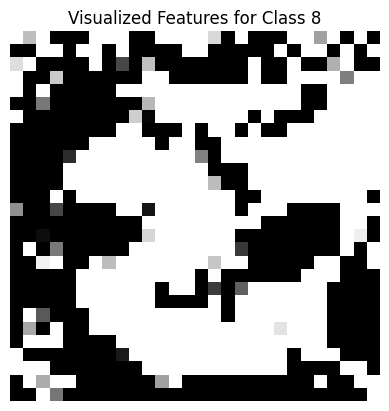

In [7]:
import matplotlib.pyplot as plt


# Function to generate an input image that maximizes a specific class
def visualize_class(model, target_class, steps=50, lr=0.1):
    model.eval()
    # Start with random noise as input
    input_image = torch.randn((1, 1, 28, 28), requires_grad=True, device=device)
    optimizer = optim.Adam([input_image], lr=lr)

    for step in range(steps):
        optimizer.zero_grad()
        output = model(input_image)
        loss = -output[0, target_class]  # Maximize activation for target_class
        loss.backward()
        optimizer.step()

        # Clamp input image to valid range
        input_image.data = input_image.data.clamp(0, 1)

    return input_image.detach().cpu().squeeze()


# Visualize the feature for class '0'
target_class = 8  # Change this to visualize other classes
generated_image = visualize_class(model, target_class)

# Plot the generated image
plt.imshow(generated_image, cmap="gray")
plt.title(f"Visualized Features for Class {target_class}")
plt.axis("off")
plt.show()